In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Heart Disease data.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
for col in df:
  print(df[col].value_counts())

age
58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: count, dtype: int64
sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
trestbps
120    128
130    123
140    107
110     64
150     55
138     45
128     39
125     38
160     36
112     30
132     28
118     24
108     21
124     20
135     20
145     17
134     17
152     17
170     15
122     14
100     14
136     11
126     10
180     10
142      9
115      9
105      9
146      8
148      7
178      7
94       7
144      6
102      6
154      4
117      4
165      4
200      4
114      4
123      4
192      3
106      3
104      3
129      3
174   

In [10]:
df.duplicated().sum()

723

In [11]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [12]:
df_corr = df.corr()
df_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


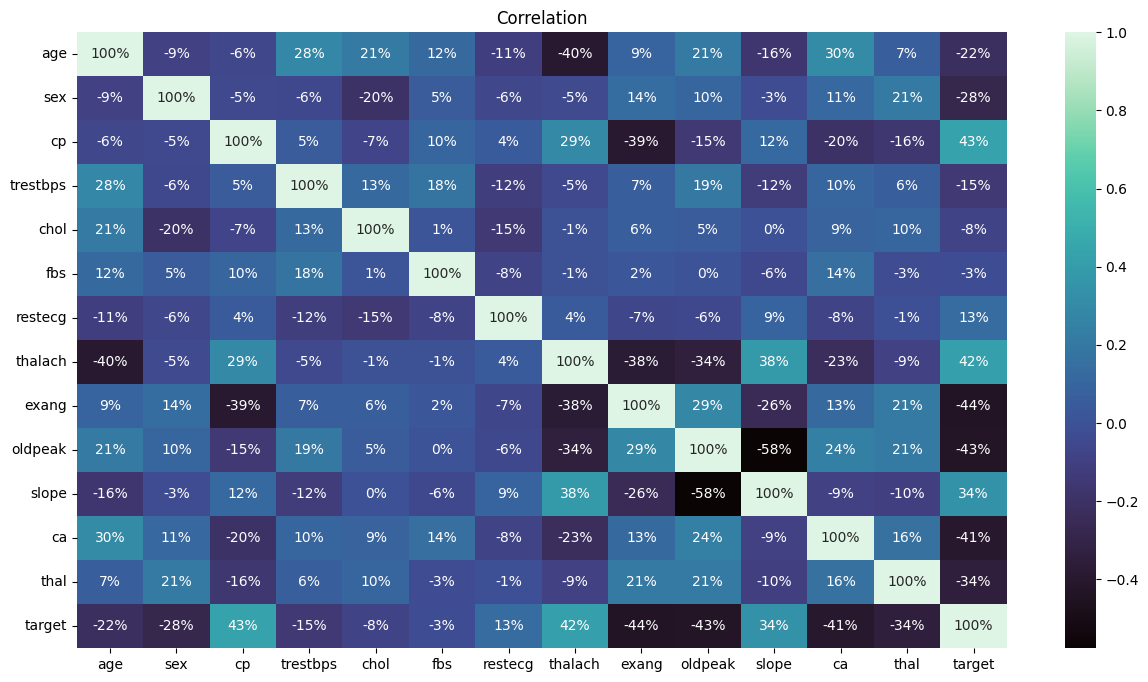

In [13]:
plt.figure(figsize=(15,8))
plt.title('Correlation')
sns.heatmap(df_corr, annot=True, fmt = '.0%', cmap='mako');

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
df.rename(columns = {'cp':'chest_pain', 'trestbps':'resting_bp', 'chol':'cholesterol', 'fbs':'fasting_blood_sugar', 'restecg':'resting_ecg', 'thalach': 'max_heartrate', 'exang': 'exercise_induced_angina', 'ca': 'num_vessels_colored', 'thal': 'thalassemia', 'target': 'heart_disease'}, inplace=True)

In [21]:
df['sex'] = df['sex'].replace({1:'Male', 0:'Female'})
df['chest_pain'] = df['chest_pain'].replace({0: 'Typical Angina', 1: 'Atypical Angina',
                                                        2: 'Non-Anginal', 3: 'Asymptomatic Ischemia'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({0:'Normal', 1: 'Abnormal'})
df['resting_ecg'] = df['resting_ecg'].replace({0: 'Normal', 1: 'Abnormal', 2: 'Diagnosed'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].replace({0: 'No', 1: 'Yes'})
df['slope'] = df['slope'].replace({0: 'Unsloping', 1: 'Flat', 2: 'Downsloping'})
df['thalassemia'] = df['thalassemia'].replace({0: 'Normal', 1: 'Fixed defect', 2: 'Reversible defect',
                                                          3: 'Extensive defect'})
df['heart_disease'] = df['heart_disease'].replace({0: 'No', 1: 'Yes'})
df.head(10)

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heartrate,exercise_induced_angina,oldpeak,slope,num_vessels_colored,thalassemia,heart_disease
0,52,Male,Typical Angina,125,212,Normal,Abnormal,168,No,1.0,Downsloping,2,Extensive defect,No
1,53,Male,Typical Angina,140,203,Abnormal,Normal,155,Yes,3.1,Unsloping,0,Extensive defect,No
2,70,Male,Typical Angina,145,174,Normal,Abnormal,125,Yes,2.6,Unsloping,0,Extensive defect,No
3,61,Male,Typical Angina,148,203,Normal,Abnormal,161,No,0.0,Downsloping,1,Extensive defect,No
4,62,Female,Typical Angina,138,294,Abnormal,Abnormal,106,No,1.9,Flat,3,Reversible defect,No
5,58,Female,Typical Angina,100,248,Normal,Normal,122,No,1.0,Flat,0,Reversible defect,Yes
6,58,Male,Typical Angina,114,318,Normal,Diagnosed,140,No,4.4,Unsloping,3,Fixed defect,No
7,55,Male,Typical Angina,160,289,Normal,Normal,145,Yes,0.8,Flat,1,Extensive defect,No
8,46,Male,Typical Angina,120,249,Normal,Normal,144,No,0.8,Downsloping,0,Extensive defect,No
9,54,Male,Typical Angina,122,286,Normal,Normal,116,Yes,3.2,Flat,2,Reversible defect,No


In [22]:
df.dtypes

age                          int64
sex                         object
chest_pain                  object
resting_bp                   int64
cholesterol                  int64
fasting_blood_sugar         object
resting_ecg                 object
max_heartrate                int64
exercise_induced_angina     object
oldpeak                    float64
slope                       object
num_vessels_colored          int64
thalassemia                 object
heart_disease               object
dtype: object

In [23]:
sns.set_style('darkgrid')
plt.rc('axes', titlesize=16)
plt.rcParams.update({'font.size': 12})

In [24]:
df.describe()

,age,resting_bp,cholesterol,max_heartrate,oldpeak,num_vessels_colored
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [25]:
df.describe(include=object).transpose()


,count,unique,top,freq
sex,302,2,Male,206
chest_pain,302,4,Typical Angina,143
fasting_blood_sugar,302,2,Normal,257
resting_ecg,302,3,Abnormal,151
exercise_induced_angina,302,2,No,203
slope,302,3,Downsloping,141
thalassemia,302,4,Reversible defect,165
heart_disease,302,2,Yes,164


In [26]:
df_cat = df.select_dtypes(include=object)

for i in df_cat:
    print(f"Value counts for column {i}: \n{df_cat[i].value_counts()}\n")

Value counts for column sex: 
sex
Male      206
Female     96
Name: count, dtype: int64

Value counts for column chest_pain: 
chest_pain
Typical Angina           143
Non-Anginal               86
Atypical Angina           50
Asymptomatic Ischemia     23
Name: count, dtype: int64

Value counts for column fasting_blood_sugar: 
fasting_blood_sugar
Normal      257
Abnormal     45
Name: count, dtype: int64

Value counts for column resting_ecg: 
resting_ecg
Abnormal     151
Normal       147
Diagnosed      4
Name: count, dtype: int64

Value counts for column exercise_induced_angina: 
exercise_induced_angina
No     203
Yes     99
Name: count, dtype: int64

Value counts for column slope: 
slope
Downsloping    141
Flat           140
Unsloping       21
Name: count, dtype: int64

Value counts for column thalassemia: 
thalassemia
Reversible defect    165
Extensive defect     117
Fixed defect          18
Normal                 2
Name: count, dtype: int64

Value counts for column heart_disease: 
heart

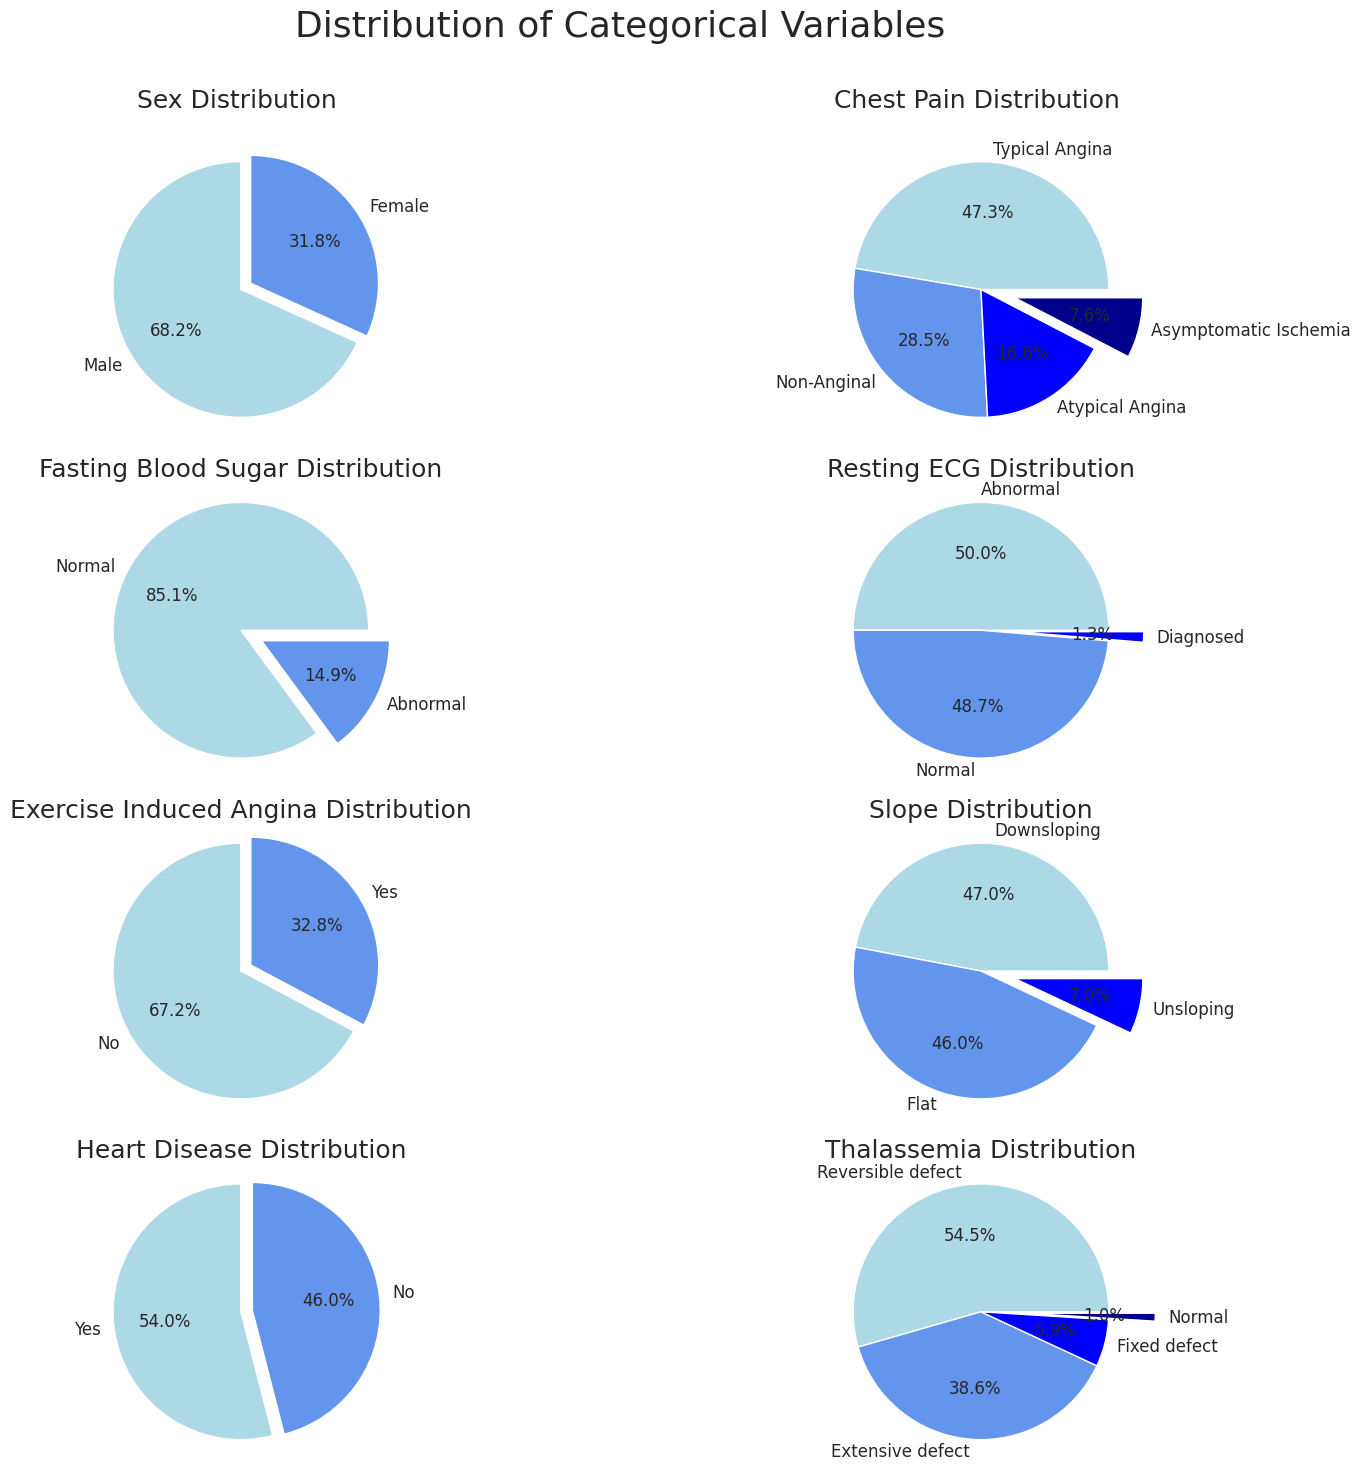

In [28]:

fig, axes = plt.subplots(4, 2, figsize=(18, 15))
fig.suptitle('Distribution of Categorical Variables \n', fontsize=26);

colors = ['#add8e6', '#6495ed', '#0000ff', '#00008b']

# Sex Distribution
sex_dist = round(df_cat.sex.value_counts(normalize=True)*100, 2)
axes[0, 0].pie(sex_dist, labels=sex_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.1), startangle=90, colors=colors)
axes[0, 0].set_title('Sex Distribution \n', fontsize=18);

# Chest Pain Distribution
chest_pain_dist = round(df_cat.chest_pain.value_counts(normalize=True)*100, 2)
axes[0, 1].pie(chest_pain_dist, labels=chest_pain_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0,0,0,0.3), colors=colors)
axes[0, 1].set_title('Chest Pain Distribution \n', fontsize=18);

# FBS Distribution
fbs_dist = round(df_cat.fasting_blood_sugar.value_counts(normalize=True)*100,2)
axes[1, 0].pie(fbs_dist, labels=fbs_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.2), colors=colors)
axes[1, 0].set_title('Fasting Blood Sugar Distribution', fontsize=18);

# ECG Distribution
ecg_dist = round(df_cat.resting_ecg.value_counts(normalize=True)*100, 2)
axes[1, 1].pie(ecg_dist, labels=ecg_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0.3), colors=colors)
axes[1, 1].set_title('Resting ECG Distribution', fontsize=18);

# Exercise induced angina Distribution
exercise_induced_angina_dist = round(df_cat.exercise_induced_angina.value_counts(normalize=True)*100, 2)
axes[2, 0].pie(exercise_induced_angina_dist, labels=exercise_induced_angina_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0,0.1), startangle=90, colors=colors)
axes[2, 0].set_title('Exercise Induced Angina Distribution', fontsize=18);

# Slope Distribution
slope_dist = round(df_cat.slope.value_counts(normalize=True), 2)
axes[2, 1].pie(slope_dist, labels=slope_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0.3), colors=colors)
axes[2, 1].set_title('Slope Distribution', fontsize=18);

# Heart Disease Distribution
heart_disease_dist = round(df_cat.heart_disease.value_counts(normalize=True), 2)
axes[3, 0].pie(heart_disease_dist, labels=heart_disease_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0.1), startangle=90, colors=colors)
axes[3, 0].set_title('Heart Disease Distribution', fontsize=18);

# Thalassemia Distribution
thalassemia_dist = round(df_cat.thalassemia.value_counts(normalize=True), 2)
axes[3, 1].pie(thalassemia_dist, labels=thalassemia_dist.index, autopct='%1.1f%%', radius=1.1, explode=(0, 0, 0, 0.4), colors=colors)
axes[3, 1].set_title('Thalassemia Distribution', fontsize=18);

plt.tight_layout()

In [ ]:
df_num = df.select_dtypes(include=int)

for col in df_num:
    print(f"Value counts for column {col}: \n{df_num[col].value_counts()}\n")

Value counts for column age: 
age
58    19
57    17
54    16
59    14
52    13
51    12
44    11
60    11
56    11
62    11
41    10
64    10
67     9
63     9
42     8
43     8
65     8
53     8
61     8
45     8
55     8
50     7
46     7
66     7
48     7
49     5
47     5
68     4
70     4
35     4
39     4
69     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
77     1
74     1
Name: count, dtype: int64

Value counts for column resting_bp: 
resting_bp
120    37
130    36
140    32
110    19
150    17
138    12
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
152     5
134     5
145     5
122     4
100     4
170     4
115     3
136     3
180     3
126     3
142     3
105     3
144     2
102     2
94      2
146     2
178     2
148     2
174     1
165     1
156     1
164     1
172     1
155     1
114     1
200     1
154     1
106     1
104     1
192     1
129     1
117     1
123     1
101     1
Name: count, dtype: int64

Value

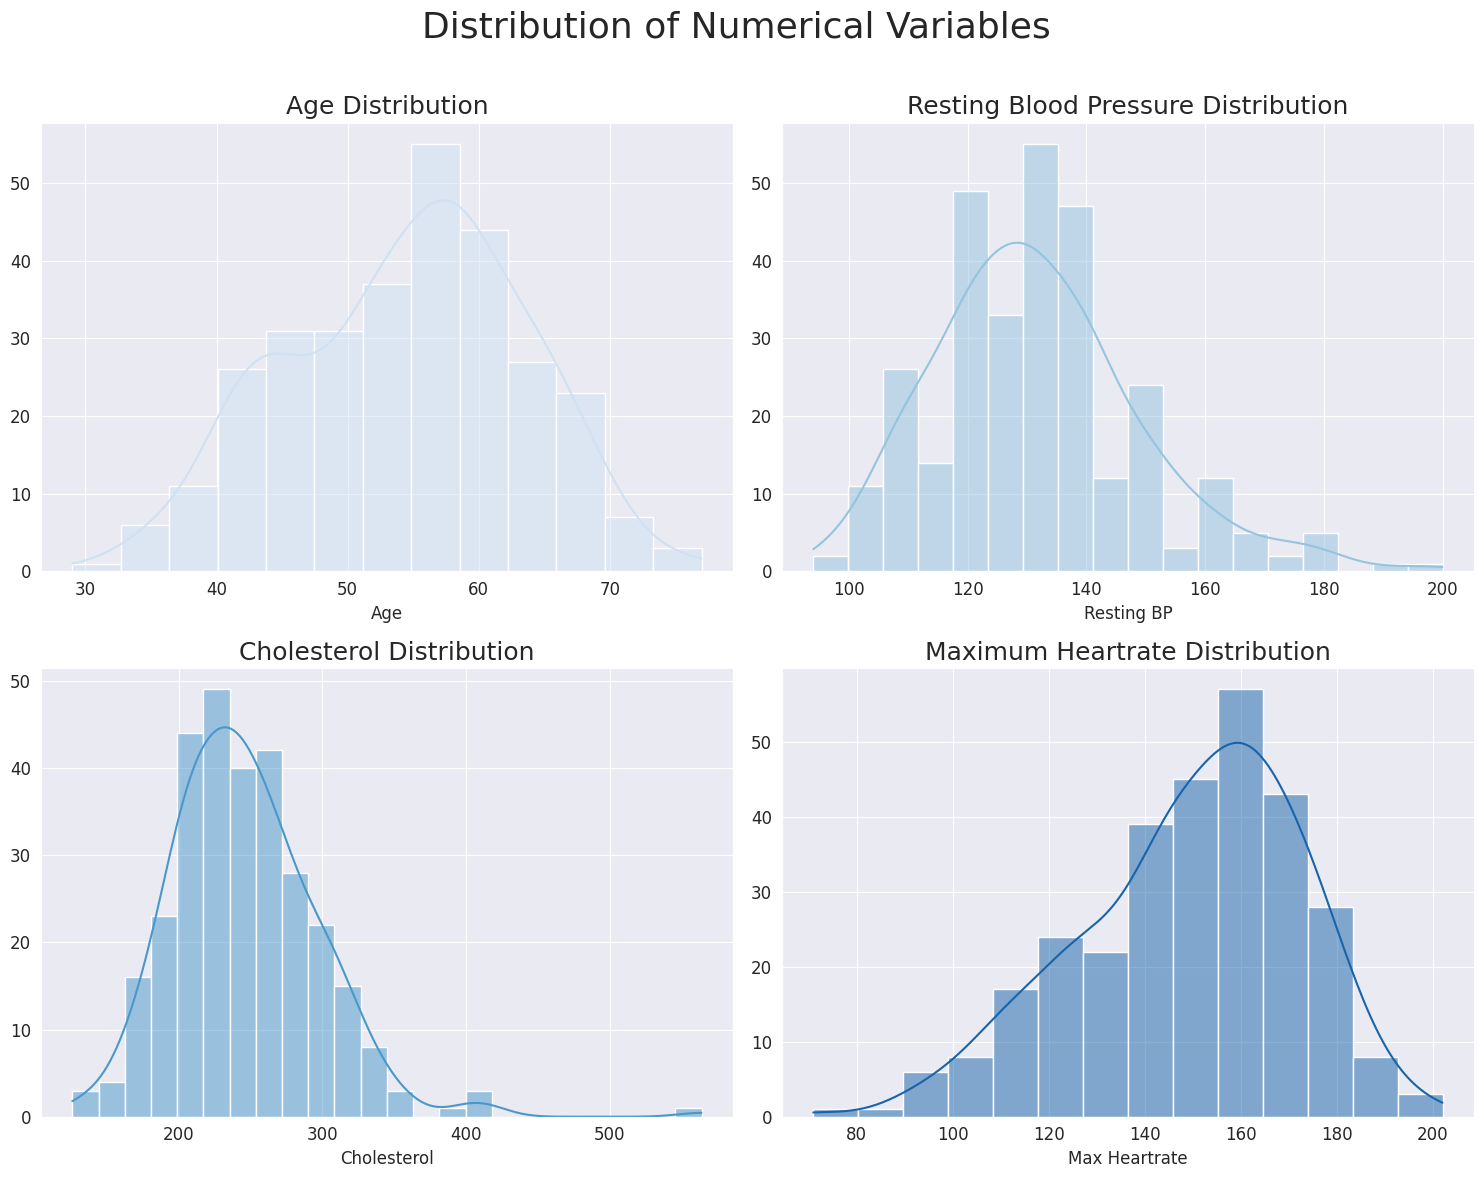

In [30]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Variables \n', fontsize=26)

# Define the color palette with shades of blue
color_palette = sns.color_palette("Blues", 4)

# Age Distribution
sns.histplot(x='age', data=df, kde=True, ax=axes[0, 0], color=color_palette[0])
axes[0, 0].set_title('Age Distribution', fontsize=18)
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('')

# Resting Blood Pressure Distribution
sns.histplot(x='resting_bp', data=df, kde=True, ax=axes[0, 1], color=color_palette[1])
axes[0, 1].set_title('Resting Blood Pressure Distribution', fontsize=18)
axes[0, 1].set_xlabel('Resting BP')
axes[0, 1].set_ylabel('')

# Cholesterol Distribution
sns.histplot(x='cholesterol', data=df, kde=True, ax=axes[1, 0], color=color_palette[2])
axes[1, 0].set_title('Cholesterol Distribution', fontsize=18)
axes[1, 0].set_xlabel('Cholesterol')
axes[1, 0].set_ylabel('')

# Maximum Heartrate Distribution
sns.histplot(x='max_heartrate', data=df, kde=True, ax=axes[1, 1], color=color_palette[3])
axes[1, 1].set_title('Maximum Heartrate Distribution', fontsize=18)
axes[1, 1].set_xlabel('Max Heartrate')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


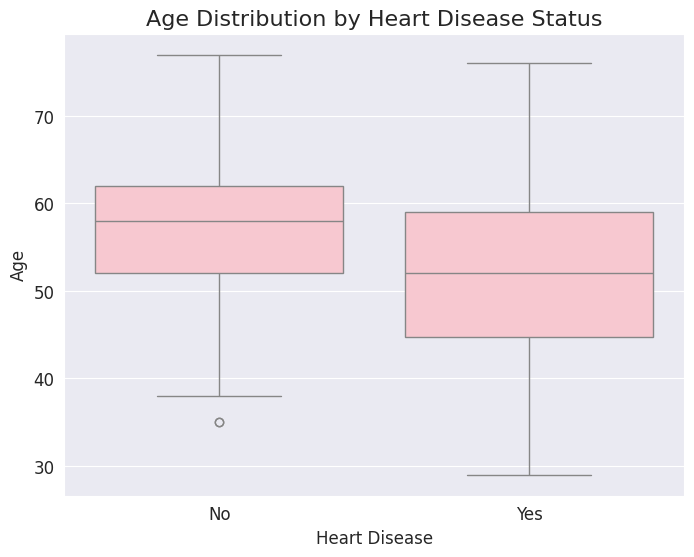

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x='heart_disease',
            y='age',
            data=df,
           color='pink')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Age');

In [33]:
sex_hd_dist = pd.crosstab(df['sex'], df['heart_disease'])
sex_hd_dist

heart_disease,No,Yes
sex,,
Female,24,72
Male,114,92


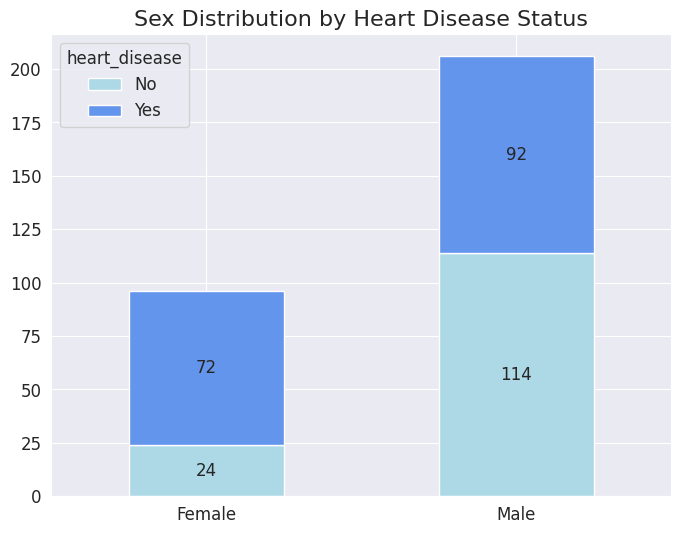

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
sex_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Sex Distribution by Heart Disease Status')
plt.xlabel('');
plt.xticks(rotation=0);


for container in ax.containers:
    ax.bar_label(container, label_type='center')

In [35]:
chest_hd_dist = pd.crosstab(df.chest_pain, df.heart_disease)
chest_hd_dist

heart_disease,No,Yes
chest_pain,,
Asymptomatic Ischemia,7,16
Atypical Angina,9,41
Non-Anginal,18,68
Typical Angina,104,39


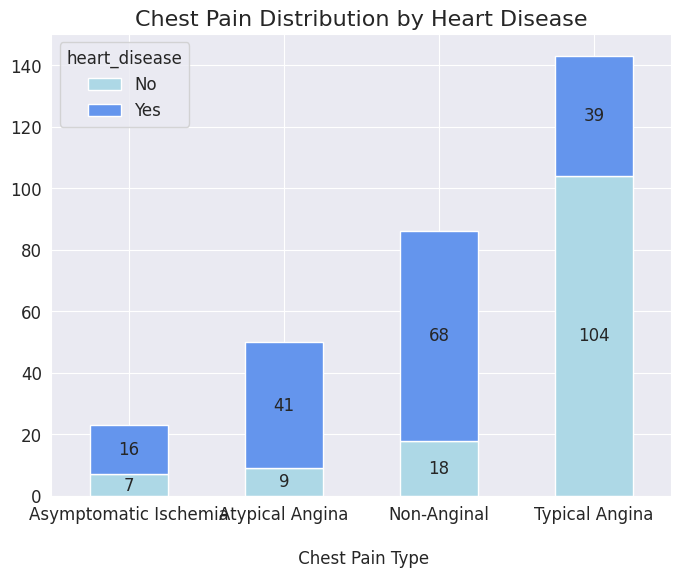

In [36]:
fig,ax = plt.subplots(figsize=(8, 6))
chest_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Chest Pain Distribution by Heart Disease')
plt.xlabel('\n Chest Pain Type')
plt.xticks(rotation=0);

for container in ax.containers:
    ax.bar_label(container, label_type='center')

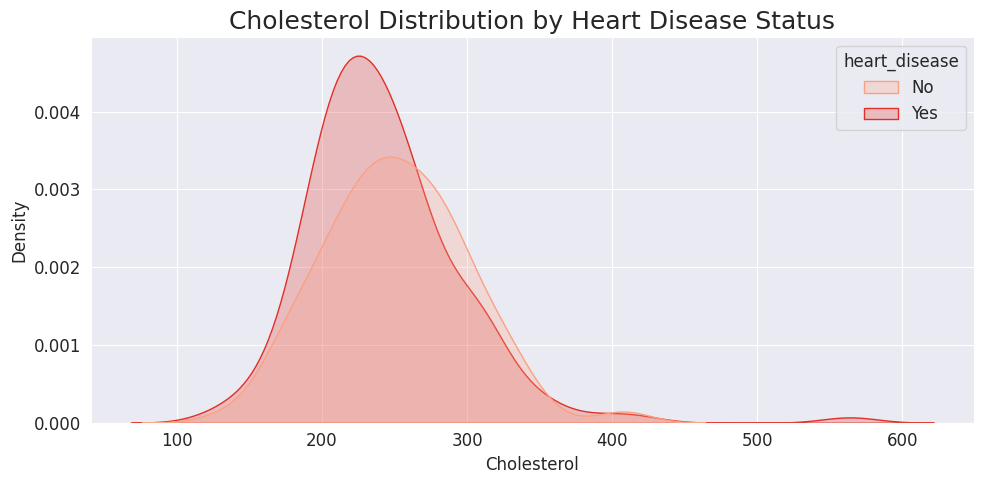

In [38]:
plt.figure(figsize=(10, 5))

color_palette = sns.color_palette("Reds", 2)

sns.kdeplot(x='cholesterol', hue='heart_disease', data=df, fill=True, palette=color_palette)
plt.title('Cholesterol Distribution by Heart Disease Status', fontsize=18)
plt.xlabel('Cholesterol')
plt.tight_layout()
plt.show()

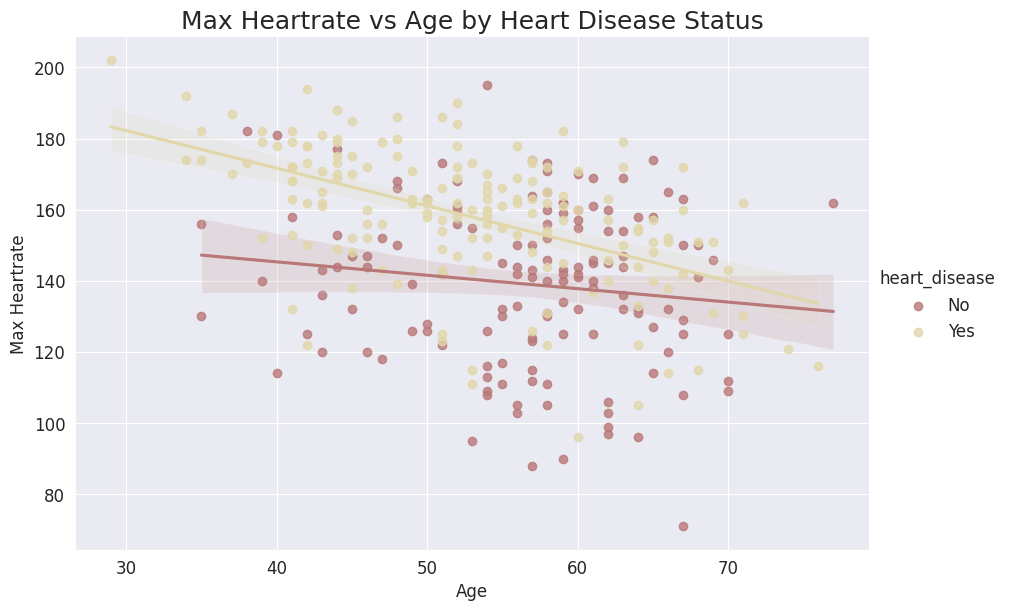

In [39]:
color_palette = sns.color_palette("pink", 2)

sns.lmplot(y='max_heartrate', x='age', hue='heart_disease', data=df, height=6, aspect=1.5, palette=color_palette)
plt.title('Max Heartrate vs Age by Heart Disease Status', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Max Heartrate')
plt.show()

In [40]:
fbs_hd_dist = pd.crosstab(df.fasting_blood_sugar, df.heart_disease)
fbs_hd_dist

heart_disease,No,Yes
fasting_blood_sugar,,
Abnormal,22,23
Normal,116,141


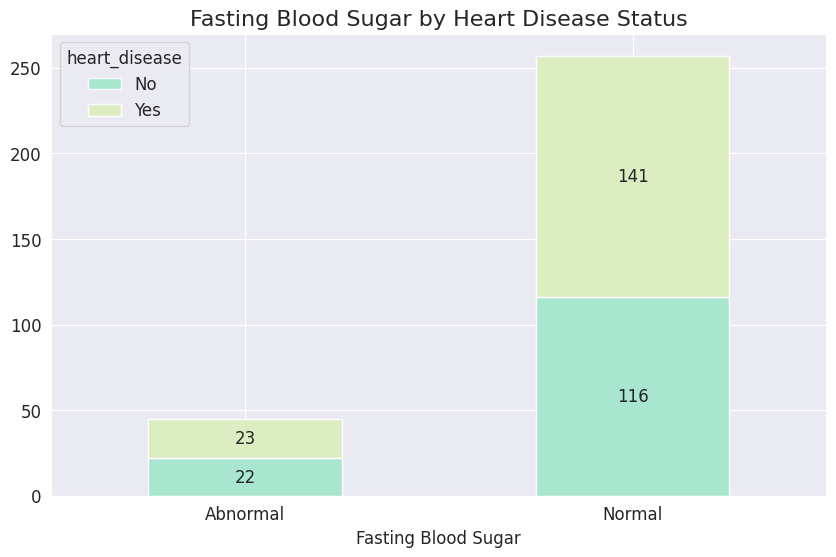

In [41]:
colors = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5']
fig,ax = plt.subplots(figsize=(10, 6))
fbs_hd_dist.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Fasting Blood Sugar by Heart Disease Status')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')

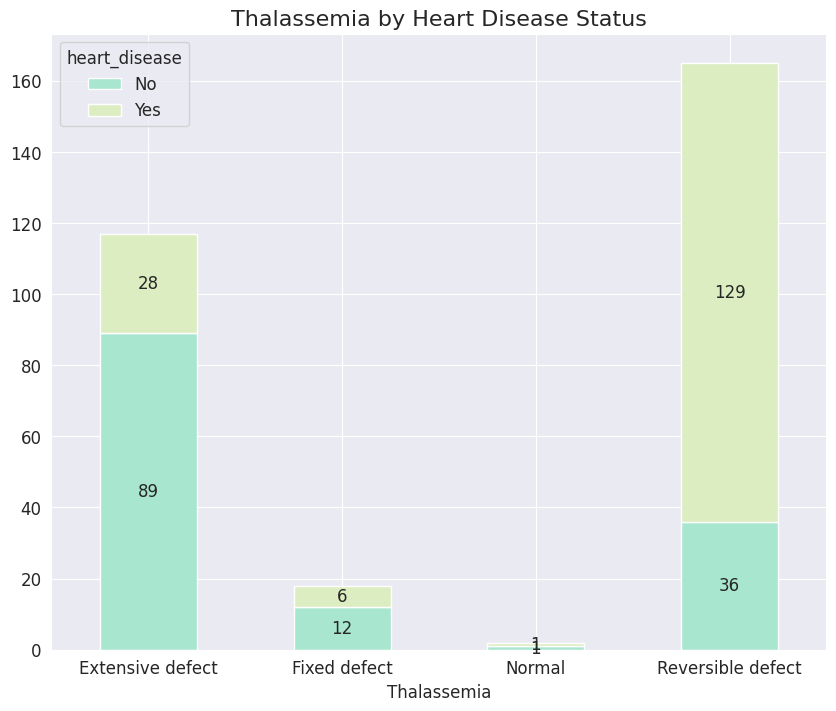

In [42]:
colors = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5']
fig, ax = plt.subplots(figsize=(10,8))
pd.crosstab(df.thalassemia, df.heart_disease).plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.title('Thalassemia by Heart Disease Status')
plt.xlabel('Thalassemia')
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center');

In [43]:
slope_hr = round(df.groupby(['slope', 'heart_disease'])['max_heartrate'].mean().unstack(), 2)
slope_hr

heart_disease,No,Yes
slope,,
Downsloping,155.11,162.24
Flat,133.48,150.08
Unsloping,135.00,158.11


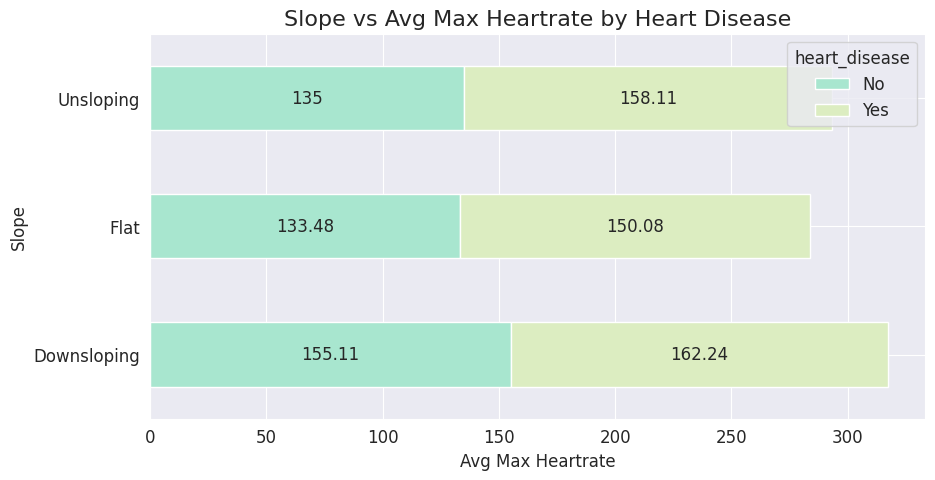

In [44]:
colors = ['#a8e6cf', '#dcedc1', '#ffd3b6', '#ffaaa5']
fig, ax = plt.subplots(figsize=(10, 5))
slope_hr.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.title('Slope vs Avg Max Heartrate by Heart Disease')
plt.xlabel('Avg Max Heartrate')
plt.ylabel('Slope')

for container in ax.containers:
    ax.bar_label(container, label_type='center')